# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as st
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (LinearRegression)
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from loguru import logger
from sklearn.model_selection import StratifiedKFold
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA as pci

from sklearn.datasets import load_digits


/home/guarinho/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [3]:
fifa = pd.read_csv("fifa.csv")

In [4]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [5]:
fifa.head()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [6]:
corr = fifa.corr()
corr.style.background_gradient(cmap='coolwarm')

In [7]:
fifa.isnull().sum()

Age                 0
Overall             0
Potential           0
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
GKReflexes         48
dtype: int64

In [8]:
fifa.dtypes


Age                  int64
Overall              int64
Potential            int64
Crossing           float64
Finishing          float64
HeadingAccuracy    float64
ShortPassing       float64
Volleys            float64
Dribbling          float64
Curve              float64
FKAccuracy         float64
LongPassing        float64
BallControl        float64
Acceleration       float64
SprintSpeed        float64
Agility            float64
Reactions          float64
Balance            float64
ShotPower          float64
Jumping            float64
Stamina            float64
Strength           float64
LongShots          float64
Aggression         float64
Interceptions      float64
Positioning        float64
Vision             float64
Penalties          float64
Composure          float64
Marking            float64
StandingTackle     float64
SlidingTackle      float64
GKDiving           float64
GKHandling         float64
GKKicking          float64
GKPositioning      float64
GKReflexes         float64
d

In [9]:

fifa_na_ = fifa.dropna()

X = fifa_na_.drop(columns='Overall').values
X_ = fifa_na_.drop(columns='Overall')
Y = fifa_na_.Overall
x = StandardScaler().fit_transform(X)
fifa_na = pd.DataFrame(x)
fifa_na.head()
print(type(x),type(Y))

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [10]:
 data = fifa_na
 pca_095 = PCA(n_components=0.95)
 X_reduced = pca_095.fit_transform(data)

 X_reduced.shape # Segundo elemento da tupla é o número de componentes encontrados.

(18159, 16)

In [11]:
data = fifa_na
# define transform
pca = PCA()
# prepare transform on dataset
pca.fit(fifa_na_)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
component_number = np.argmax(cumulative_variance_ratio >= 0.95) + 1 # Contagem começa em zero.

component_number

15

In [12]:
evr = pca.explained_variance_ratio_
evr

array([5.65280555e-01, 1.81025219e-01, 5.95283391e-02, 4.34269284e-02,
       2.63532326e-02, 1.20707695e-02, 1.03550495e-02, 8.52951131e-03,
       7.87862979e-03, 7.20416677e-03, 7.18180297e-03, 6.32893542e-03,
       5.19242286e-03, 4.90798293e-03, 4.74209042e-03, 4.62772008e-03,
       4.25173246e-03, 3.86288432e-03, 3.76588448e-03, 3.75092615e-03,
       3.47815213e-03, 3.26730709e-03, 3.03137944e-03, 2.97415845e-03,
       2.56797543e-03, 2.30353342e-03, 2.14815132e-03, 1.56135904e-03,
       1.55351696e-03, 1.08664227e-03, 1.06824189e-03, 1.05891525e-03,
       9.58143746e-04, 8.89209394e-04, 8.59732430e-04, 7.34611045e-04,
       1.94187517e-04])

In [13]:
data = fifa_na
# define transform
pca = PCA(n_components=2)
# prepare transform on dataset
pca.fit(data,Y)
# apply transform to dataset
df_ = pca.transform(data)
df = pd.DataFrame(pca.transform(data))
print(f"Original shape: {data.shape}, projected shape: {df.shape}")

Original shape: (18159, 36), projected shape: (18159, 2)


In [14]:
df.head()

,0,1
0,-8.569807,-5.285358
1,-8.350256,-3.647606
2,-7.817343,-5.042854
3,8.316482,-1.946325
4,-8.467611,-1.672669


In [15]:
 evr = pca.explained_variance_ratio_
 evr

array([0.52629478, 0.1369719 ])

In [16]:
# df.columns = df[:]
df.head()

,0,1
0,-8.569807,-5.285358
1,-8.350256,-3.647606
2,-7.817343,-5.042854
3,8.316482,-1.946325
4,-8.467611,-1.672669


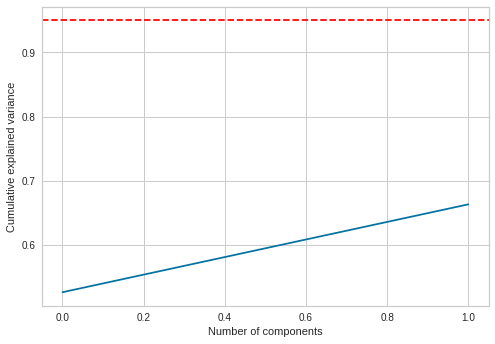

In [17]:
g = sns.lineplot(np.arange(len(evr)), np.cumsum(evr))
g.axes.axhline(0.95, ls="--", color="red")
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

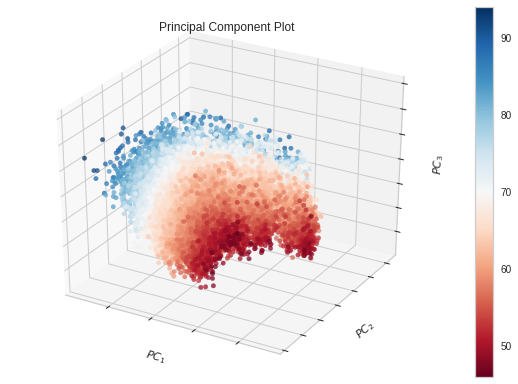

In [18]:

# # Specify the features of interest and the target
classes = ['Age', 'Potential', 'HeadingAccuracy', 'ShortPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Reactions', 'Stamina', 'Strength', 'Positioning', 'Composure', 'GKDiving', 'GKHandling', 'GKKicking', 'GKReflexes']

visualizer = pci(scale=True,projection=3, classes=classes)
visualizer.fit_transform(x, Y)

visualizer.show()


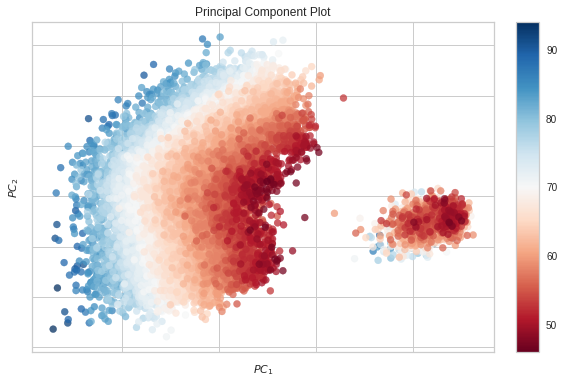

In [19]:
# # Load the concrete dataset

visualizer = pci(scale=True, proj_features=False,cmap='reset')
visualizer.fit_transform(x, Y)
visualizer.show()


In [20]:
#tfidf = TfidfVectorizer()
#X = tfidf.fit_transform(X_)

 # Create the visualizer and draw the vectors
#tsne = TSNEVisualizer(decompose_by=2, cmap='reset')
#print(X.shape, Y.shape, X_.shape)
#tsne.fit(X, Y)
#tsne.show()





In [21]:
fea = X_.loc[:,['Age', 'Potential', 'HeadingAccuracy', 'ShortPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Reactions', 'Stamina', 'Strength', 'Positioning', 'Composure', 'GKDiving', 'GKHandling', 'GKKicking']]

In [22]:
scaler = StandardScaler()
scaler.fit(fea)
X=scaler.transform(fea)    
pca = PCA()
x_new = pca.fit_transform(X)

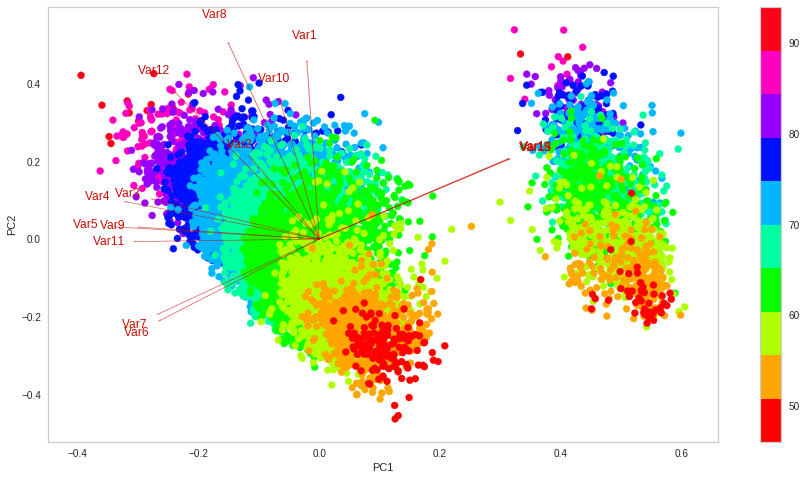

In [23]:
 def myplot(score,coeff,labels=None):
     fig = plt.figure(figsize = (15,8))
     cmap=plt.cm.get_cmap('hsv', 10)
     xs = score[:,0]
     ys = score[:,1]
     n = coeff.shape[0]
     scalex = 1.0/(xs.max() - xs.min())
     scaley = 1.0/(ys.max() - ys.min())
     plt.scatter(xs * scalex,ys * scaley, c = Y, cmap=cmap)
     for i in range(n):
         plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
         if labels is None:
             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'r', ha = 'center', va = 'center')
         else:
             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
     #plt.xlim(-1,1)
     #plt.ylim(-1,1)
     plt.xlabel("PC{}".format(1))
     plt.ylabel("PC{}".format(2))
     plt.grid()
     jet = cm = plt.get_cmap('jet') 
 #Call the function. Use only the 2 PCs.
 myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))

 plt.colorbar()
 plt.show()

In [24]:
X = fifa_na_.drop(columns='Overall')
lr = LinearRegression(normalize=True)
rfe = RFE(lr, n_features_to_select=5, verbose =3 ).fit(X,Y)
#ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
print(list(X.columns[rfe.support_]))

Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 fea

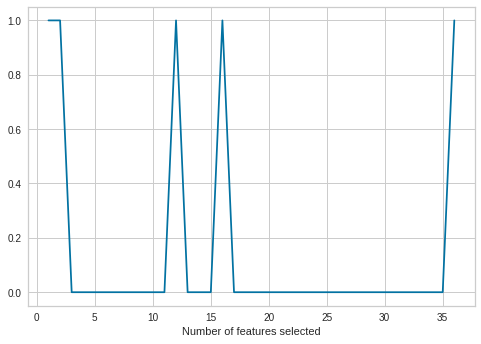

In [25]:
 plt.figure()
 plt.xlabel("Number of features selected")
 plt.ylabel("")
 plt.plot(range(1, len(rfe.support_) + 1), rfe.support_)
 plt.show()


## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

In [26]:
def q1():
    return float(round(evr[0],3))
    

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

In [27]:
def q2():
    return int(component_number)

## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [28]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

In [29]:
def q3():
    pca = PCA(n_components=2).fit(fifa.dropna())
    pc = tuple(pca.components_.dot(x).round(3))
    return pc

## Questão 4

Realiza RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

In [30]:
def q4():
    return list(X.columns[rfe.support_])